# A Rod-Pendulum System

**Project deadline:** This project is due for submission on Thursday, 26.06.2025, 23:55. Please check carefully the *About the Projects* section below for further details.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We hand-out four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Thursday 26th of June, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## This project

We consider the following system of a rod and two pendulums:

<center><img src="figs/rod-pendulum.png" width=400 /><center/>

The massless rod of length $2L$ can rotate freely around the origin and is assumed to be massless. The system has two mounts (point masses $m_1$ and $m_2$) at the ends of the rod to which two pendulums are connected. The pendulums (lengths $l_1$ and $l_2$) can rotate freely around the mounts. The pendulums consist of two point masses $m_3$ and $m_4$ but are massless otherwise. The only external force on the system is gravitation and the systems movement all take place in the two-dimensional $x-y$ plane.

To simplify things, we set all the four masses equal, i.e. $m = m_1 = m_2 = m_3 = m_4$ and also $l = l_1 = l_2$ with $l < L$.

## Your tasks

1. Identify generalised coordinates of the system. Write down your choice in a markdown cell.
2. Use SymPy to analytically construct the Lagragian and the equations of motion for the system.
3. Use SciPy to numerically solve the equations of motions for different initial conditions (at least 4). Use conditions that show a linear, predictable evolution of the system but also chaotic behaviour. Consider a timeline of around 50 seconds.
4. We want to test whether our numeric solution is reasonable. To this end, consider and discuss the time evolution of the total energy of the system. What is your expectation and does the numeric solution behave as it should? Please investigate longer simulation times for this task.
5. Plot and discuss the time evolution of the energies from rod (masses $m_1$, $m_2$) and the pendulums (masses $m_3$, $m_4$). 
6. Create animations showing the movements of the system.

**Remarks:** (1) In the lecture I concentrated on demonstrating SymPy and how to use it. However, from the point-of-view of *code compactness* and *code reusabilty* the notebook is not good. I basically just continuously repeated and duplicated code for the two masses and for the two generalised coordinates. This becomes cumbersome and error-prone if more masses/coordinates are involved and quickly unmaintainable if you decide to modify the system, add new masses etc. Hence, please structure your project code and data in a better way from the very beginning; (2) In the SciPy lecture, I mentioned that, besides `odeint`, there is a second numeric solver `solve_ivp` within `scipy.integrate`. One possibility to earn bonus points is to compare and to discuss solutions of both solvers.

In [1]:
# import needed packages
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as si
from matplotlib import animation

## Task 1
For the generalised coordinates I choose three angles: $\theta_1$, $\theta_2$ and $\theta_3$, where $\theta_1$ is the angle between the rod connecting the origin and mass $m_1$ 
and the horizontal. \
$\theta_2$ describes the angle between the the rod connecting $m_1$ and $m_3$ and the vertical.
$\theta_3$ describes the angle between the the rod connecting $m_2$ and $m_4$ and the vertical.

## Task 2

In [2]:
# define the necessary constants and variables
L, l, t, m, g= sp.symbols(r'L l t m g')
theta1, theta2, theta3 = sp.symbols(r'\theta_1 \theta_2 \theta_3', cls=sp.Function)
theta1 = theta1(t)
theta2 = theta2(t)
theta3 = theta3(t)

# create first and second derivative of the thetas
theta1_d = sp.diff(theta1, t)
theta2_d = sp.diff(theta2, t)
theta3_d = sp.diff(theta3, t)
theta1_dd = sp.diff(theta1_d, t)
theta2_dd = sp.diff(theta2_d, t)
theta3_dd = sp.diff(theta3_d, t)

# define the x and y coordinates of the four masses in terms of the generalised coordinates
x1 = L * sp.cos(theta1)
y1 = - L * sp.sin(theta1)

x2 = -x1
y2 = -y1 

x3 = x1 + l * sp.cos(theta2)
y3 = y1 - l * sp.sin(theta2)

x4 = x2 + l * sp.cos(theta3)
y4 = y2 - l * sp.sin(theta3)

# define the kinetic and potential energies for all masses
T1 = sp.Rational(1, 2) * m * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2)
V1 = m * g * y1
T2 = sp.Rational(1, 2) * m * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2)
V2 = m * g * y2
T3 = sp.Rational(1, 2) * m * (sp.diff(x3, t)**2 + sp.diff(y3, t)**2)
V3 = m * g * y3
T4 = sp.Rational(1, 2) * m * (sp.diff(x4, t)**2 + sp.diff(y4, t)**2)
V4 = m * g * y4

# define total kinetic and potential energies of the system and the Lagrangian
T = (T1 + T2 + T3 + T4).simplify()
V = (V1 + V2 + V3 + V4).simplify()
Lagrange = (T - V).simplify()

# create the Lagrange's equations
LE1 = (sp.diff(Lagrange, theta1) - sp.diff(sp.diff(Lagrange, theta1_d), t)).simplify()
LE2 = (sp.diff(Lagrange, theta2) - sp.diff(sp.diff(Lagrange, theta2_d), t)).simplify()
LE3 = (sp.diff(Lagrange, theta3) - sp.diff(sp.diff(Lagrange, theta3_d), t)).simplify()

# create the differential equations
sol = sp.solve([LE1, LE2, LE3],  [theta1_dd, theta2_dd, theta3_dd])


In [3]:
sol[theta1_dd].simplify()

(L*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2 + L*sin(2*\theta_1(t) - 2*\theta_3(t))*Derivative(\theta_1(t), t)**2 + g*cos(\theta_1(t) - 2*\theta_2(t)) - g*cos(\theta_1(t) - 2*\theta_3(t)) + 2*l*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 2*l*sin(\theta_1(t) - \theta_3(t))*Derivative(\theta_3(t), t)**2)/(L*(cos(2*\theta_1(t) - 2*\theta_2(t)) + cos(2*\theta_1(t) - 2*\theta_3(t)) - 6))

## Task 3

In [4]:
L

L

In [5]:
# convert symbolic expressions to numerical functions
theta1_dd_n = sp.lambdify((theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g), sol[theta1_dd].simplify())

theta2_dd_n = sp.lambdify([theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g], sol[theta2_dd].simplify())
                           
theta3_dd_n = sp.lambdify([theta1, theta2, theta3,
                           theta1_d, theta2_d, theta3_d,
                           L, l, m, g], sol[theta3_dd].simplify())

In [6]:
def dSdt(S, t, L, l, m, g):
    ''' This function takes the '''
    theta1, theta2, theta3, u, v, w = S
    
    dtheta1dt = u
    dtheta2dt = v
    dtheta3dt = w
    dudt = theta1_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    dvdt = theta2_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    dwdt = theta3_dd_n(theta1, theta2,  theta3, u, v, w, L, l, m, g)
    
    return [dtheta1dt, dtheta2dt, dtheta3dt, dudt, dvdt, dwdt]


n_seconds = 20
n_frames = 600
L, l, m, g = 2, 1, 0.5, 9.81
t_n = np.linspace(0.0, n_seconds, n_frames)

S0 = [np.pi / 2, 0.0, 3*np.pi/2, 0, 0, 0]
#S0 = [np.pi / 4., 0.0, 0.0, 0.0]
sol_dgl = si.odeint(dSdt, S0, t=t_n, args=(L, l, m, g))
#plt.plot(t_n, sol_dgl[:,0])

In [7]:
def get_x1y1x2y2x3y3x4y4(theta1, theta2, theta3):
    return (L * np.cos(theta1),
            - L * np.sin(theta1),
            - L * np.cos(theta1),
            - L * np.sin(theta1),
            L * np.cos(theta1) + l * np.cos(theta2),
            L * np.sin(theta1) - l * np.sin(theta2),
            - L * np.cos(theta1) + l * np.cos(theta3),
            - L * np.sin(theta1) - l * np.sin(theta3)
    )

# fix constants
L, l, m, g = 2, 1, 0.5, 9.81

#get_x1y1x2y2x3y3x4y4(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])

#t1, t2, t3, t4, t5, t6, t7, t8 = np.shape(get_x1y1x2y2x3y3x4y4(0,0,0))

x1_n, y1_n, x2_n, y2_n, x3_n, y3_n, x4_n, y4_n = get_x1y1x2y2x3y3x4y4(sol_dgl[:,0], sol_dgl[:,1], sol_dgl[:,2])


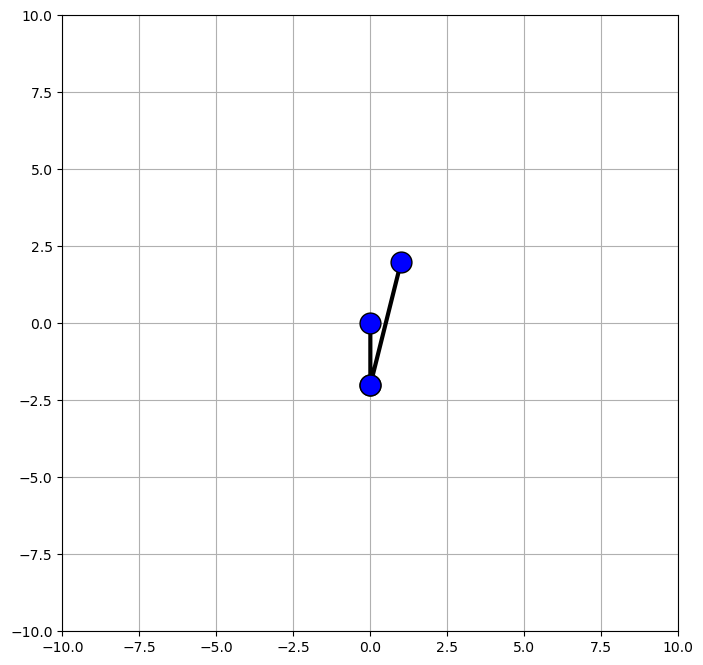

In [8]:
def animate(i, ln1):
    ln1.set_data([0, x1_n[i], x2_n[i], x3_n[i]], [0, y1_n[i], y2_n[i], y3_n[i]])
    #ln2.set_data(x2_n[:i], y2_n[:i])
    
    return ln1,

fig, ax = plt.subplots(1,1, figsize=(8,8))

# pemdulum system
ln1, = plt.plot([], lw=3, markersize=15, marker='o', 
                color='black', markerfacecolor='blue')

# movement traces of second pendulum:
#ln2, = plt.plot([], [], lw=2, color='blue', alpha=0.4)

ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ax.grid()
ax.set_aspect('equal')

ani = animation.FuncAnimation(fig, animate, fargs=(ln1,),
                              frames=n_frames)

ani.save('pendulum.gif', writer='pillow', fps=(n_frames / n_seconds))

In [14]:
# define the x and y coordinates of the four masses in terms of the generalised coordinates
#x1 = L * sp.cos(theta1)
#y1 = L * sp.sin(theta1)
#
#x2 = - L * sp.cos(theta1)
#y2 = - L * sp.sin(theta1)
#
#x3 = x1 + l * sp.sin(theta2)
#y3 = y1 - l * sp.cos(theta2)
#
#x4 = x2 + l * sp.sin(theta3)
#y4 = y2 - l * sp.cos(theta3)